In [1]:
import pandas as pd
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_df = pd.read_csv('./data/train.csv')
test_df = pd.read_csv('./data/test.csv')

In [3]:
train_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,9,2520,0,2014,0,98056,47.5137,-122.167,2520,6023
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,9,2600,910,2009,0,98136,47.5537,-122.398,2050,6200
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200


In [4]:
# 결측치 확인
test_df.isnull().sum()

id               0
date             0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [5]:
# 결측치 확인
train_df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
# 날짜 데이터에서 연/월 추출
train_df['year'] = train_df['date'].apply(lambda i: i[:4]).astype(int)
train_df['month'] = train_df['date'].apply(lambda i: i[4:6]).astype(int)
test_df['year'] = test_df['date'].apply(lambda i: i[:4]).astype(int)
test_df['month'] = test_df['date'].apply(lambda i: i[4:6]).astype(int)

In [7]:
train_df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,0,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,1,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
2,2,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2
3,3,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,0,1995,0,98003,47.3097,-122.327,2238,6819,2014,6
4,4,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,0,1963,0,98198,47.4095,-122.315,1650,9711,2015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15030,15030,20141014T000000,610685.0,4,2.50,2520,6023,2.0,0,0,...,0,2014,0,98056,47.5137,-122.167,2520,6023,2014,10
15031,15031,20150326T000000,1007500.0,4,3.50,3510,7200,2.0,0,0,...,910,2009,0,98136,47.5537,-122.398,2050,6200,2015,3
15032,15032,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,...,0,2009,0,98103,47.6993,-122.346,1530,1509,2014,5
15033,15033,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,...,0,2014,0,98146,47.5107,-122.362,1830,7200,2015,2


In [8]:
# 불필요한 컬럼 삭제
del train_df['id']
del train_df['date']
del test_df['id']
del test_df['date']

IndexError: index 21 is out of bounds for axis 0 with size 21

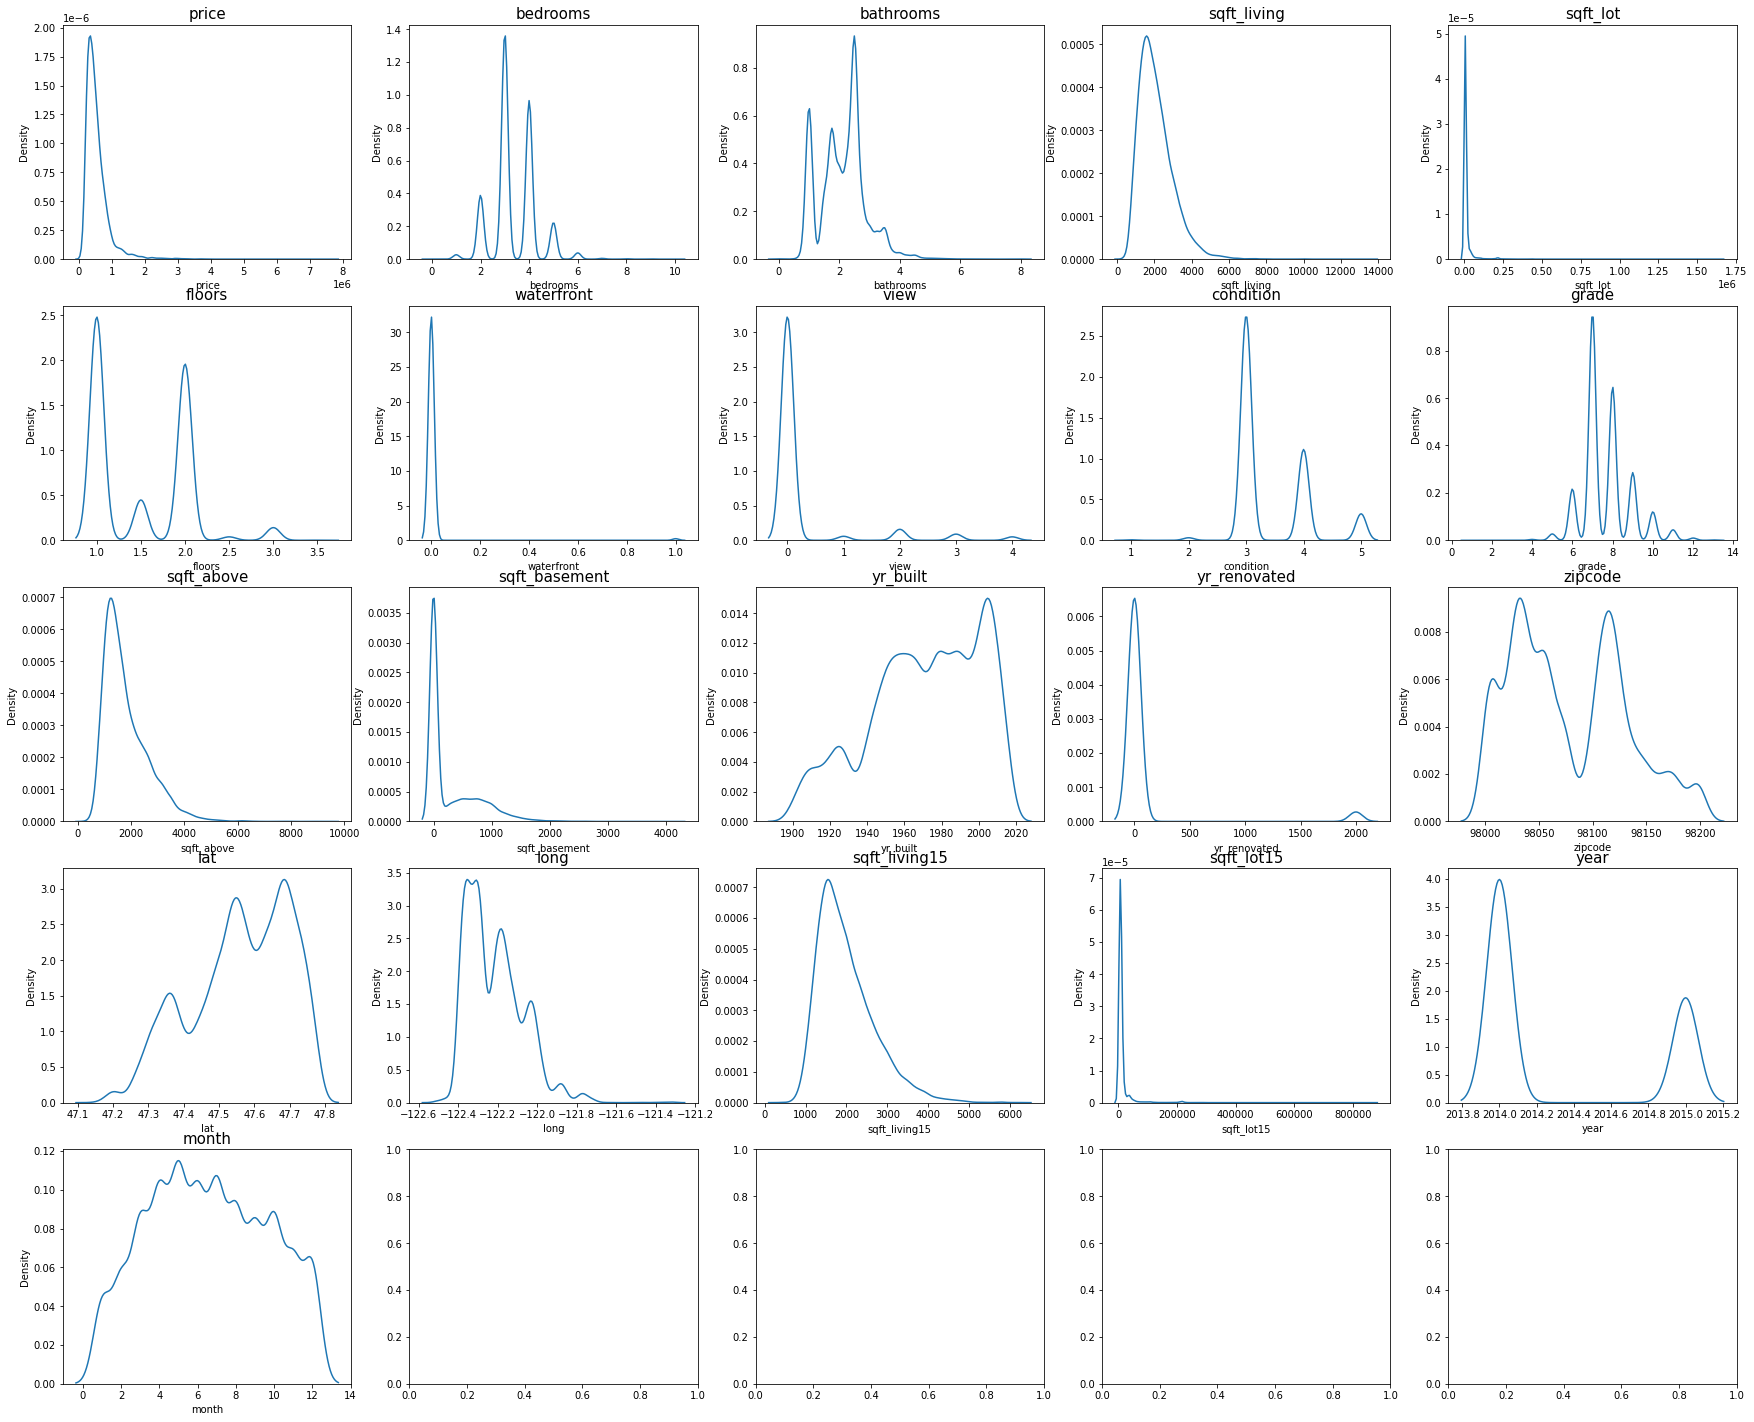

In [9]:
# kde 그래프로 데이터 분포 확인
fig, ax = plt.subplots(5, 5, figsize = (30, 25))

columns = train_df.columns
count = 0
for row in range(5):
    for col in range(5):
        sns.kdeplot(train_df[columns[count]], ax=ax[row][col])
        ax[row][col].set_title(columns[count], fontsize=15)
        count += 1
plt.show()

In [10]:
# 데이터 통계수치 확인
train_df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
count,1.503500e+04,15035.000000,15035.000000,15035.000000,1.503500e+04,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,...,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000,15035.000000
mean,5.406827e+05,3.369139,2.115065,2083.790223,1.529697e+04,1.498071,0.007117,0.234253,3.406651,7.660725,...,289.632059,1971.100432,83.798936,98078.031726,47.560721,-122.213677,1992.754772,12823.884935,2014.319654,6.580579
std,3.715247e+05,0.902721,0.767519,922.134087,4.261282e+04,0.538522,0.084063,0.763376,0.646505,1.179803,...,440.663284,29.407612,400.398498,53.297815,0.138164,0.141294,691.456442,27736.259787,0.466358,3.106349
min,7.800000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000,2014.000000,1.000000
25%,3.220000e+05,3.000000,1.750000,1430.000000,5.027500e+03,1.000000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1951.000000,0.000000,98033.000000,47.472700,-122.328000,1490.000000,5100.000000,2014.000000,4.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.620000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,...,0.000000,1975.000000,0.000000,98065.000000,47.571900,-122.231000,1850.000000,7610.000000,2014.000000,6.000000
75%,6.450000e+05,4.000000,2.500000,2560.000000,1.069550e+04,2.000000,0.000000,0.000000,4.000000,8.000000,...,550.000000,1997.000000,0.000000,98117.000000,47.678300,-122.126000,2360.000000,10076.000000,2015.000000,9.000000
max,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,...,4130.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000,2015.000000,12.000000


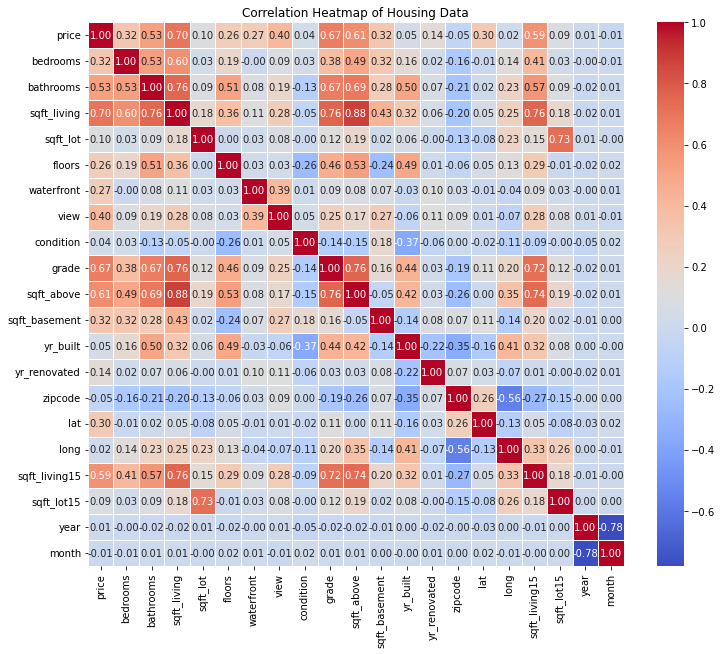

In [11]:
# 변수별 상관관계 확인
plt.figure(figsize=(12, 10))
sns.heatmap(train_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap of Housing Data")
plt.show()

In [13]:
# 타겟데이터와의 상관계수 0.5 이상인 변수들만 추출
correlation = train_df.corrwith(train_df['price']).abs()  # 타겟과 각 변수 간의 상관관계
relevant_columns = correlation[correlation >= 0.5].index  # 상관관계가 50% 이상인 컬럼
fil_train_df = train_df[relevant_columns]
fil_train_df

,price,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,221900.0,1.00,1180,7,1180,1340
1,180000.0,1.00,770,6,770,2720
2,510000.0,2.00,1680,8,1680,1800
3,257500.0,2.25,1715,7,1715,2238
4,291850.0,1.50,1060,7,1060,1650
...,...,...,...,...,...,...
15030,610685.0,2.50,2520,9,2520,2520
15031,1007500.0,3.50,3510,9,2600,2050
15032,360000.0,2.50,1530,8,1530,1530
15033,400000.0,2.50,2310,8,2310,1830


In [14]:
fil_test_df = test_df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
fil_test_df

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,2.25,2570,7,2170,1690
1,3.00,1960,7,1050,1360
2,4.50,5420,11,3890,4760
3,1.00,1780,7,1050,1780
4,2.50,1890,7,1890,2390
...,...,...,...,...,...
6463,1.75,1500,6,1500,1320
6464,2.00,1490,8,1490,1400
6465,2.50,1310,8,1180,1330
6466,0.75,1020,7,1020,1020


In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
# 정규분포 스케일러 사용
scaler = StandardScaler()

In [17]:
y = fil_train_df['price']
y

0         221900.0
1         180000.0
2         510000.0
3         257500.0
4         291850.0
           ...    
15030     610685.0
15031    1007500.0
15032     360000.0
15033     400000.0
15034     325000.0
Name: price, Length: 15035, dtype: float64

In [18]:
del fil_train_df['price']

In [19]:
scaled_data = scaler.fit_transform(fil_train_df)  # 정규분포 스케일링 적용
scaled_train_df = pd.DataFrame(scaled_data, columns=fil_train_df.columns)
scaled_train_df

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,-1.452865,-0.980140,-0.560048,-0.738427,-0.944060
1,-1.452865,-1.424775,-1.407676,-1.231387,1.051794
2,-0.149923,-0.437901,0.287579,-0.137257,-0.278776
3,0.175813,-0.399945,-0.560048,-0.095175,0.354691
4,-0.801394,-1.110277,-0.560048,-0.882708,-0.495716
...,...,...,...,...,...
15030,0.501548,0.473059,1.135206,0.872709,0.762539
15031,1.804491,1.546692,1.135206,0.968897,0.082792
15032,0.501548,-0.600573,0.287579,-0.317608,-0.669269
15033,0.501548,0.245319,0.287579,0.620218,-0.235387


In [20]:
scaled_data = scaler.fit_transform(fil_test_df)  # 정규분포 스케일링 적용
scaled_test_df = pd.DataFrame(scaled_data, columns=fil_test_df.columns)
scaled_test_df

,bathrooms,sqft_living,grade,sqft_above,sqft_living15
0,0.169745,0.542554,-0.564236,0.475704,-0.423545
1,1.136501,-0.127376,-0.564236,-0.888867,-0.914948
2,3.070012,3.672556,2.878666,2.571295,4.147997
3,-1.441514,-0.325060,-0.564236,-0.888867,-0.289526
4,0.491997,-0.204253,-0.564236,0.134561,0.618826
...,...,...,...,...,...
6463,-0.474759,-0.632569,-1.424961,-0.340602,-0.974512
6464,-0.152507,-0.643552,0.296490,-0.352786,-0.855384
6465,0.491997,-0.841236,0.296490,-0.730480,-0.959621
6466,-1.763766,-1.159727,-0.564236,-0.925418,-1.421243


In [21]:
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor as lgbm
from xgboost import XGBRegressor as xgb

/opt/conda/lib/python3.9/site-packages/pkg_resources/__init__.py:122: PkgResourcesDeprecationWarning: 0.996-ko-0.9.2 is an invalid version and will not be supported in a future release
  warnings.warn(


In [22]:
radomforest = RandomForestRegressor(random_state=42)
xgboost = xgb(random_state=42)
lightgbm = lgbm(random_state=42)

models = [{'model':radomforest, 'name':'RandomForestRegressor'}, {'model':xgboost, 'name':'XGBRegressor'},
          {'model':lightgbm, 'name':'LGBMRegressor'}]

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(scaled_train_df, y, test_size=0.2, random_state=42)

In [27]:
for model_info in models:
    model_info['model'].fit(X_train, y_train)

predictions = []
for model_info in models:
    pred = model_info['model'].predict(X_test)
    predictions.append(pred)

In [28]:
# 예측값을 위한 데이터프레임 생성
stacked_predictions = np.column_stack(predictions)

In [29]:
# 메타 모델 학습 (블렌딩)
meta_model = RandomForestRegressor()
meta_model.fit(stacked_predictions, y_test)

RandomForestRegressor()

In [30]:
# 최종 예측
final_predictions = meta_model.predict(stacked_predictions)

# 결과 출력
print("최종 예측값:", final_predictions)

최종 예측값: [278040.25       276721.02       530659.66666667 ... 323880.08333333
 524920.         446714.5       ]


In [32]:
from sklearn.metrics import mean_squared_error

In [33]:
rmse = np.sqrt(mean_squared_error(y_test, final_predictions))
print("RMSE:", rmse)

RMSE: 93307.89255184773
